# Create a VCF with additional alternative codons encoding the same amino acid. 

## 1. Preparation of the annotated file for step 3.

In [1]:
import pandas as pd
import csv
import allel
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
vep_file = "clinvar_vep_ref.vep" # clinvar.vcf аннатированный VEP
vcf_file = "clinvar.vcf" # https://ftp.ncbi.nlm.nih.gov/pub/clinvar/vcf_GRCh38/clinvar.vcf.gz

Create a header for the clinvar_ann_df dataframe

In [3]:
def make_header(file_name):
    """
    saves the vep file header
        :param file_name: vep file name
    :return header_list[0]: header list
    """
    
    
    header_list = []
    with open(file_name, "r") as file:
        while True:
            line = file.readline()
            if not line:
                break
            if line.split()[0] == "#Uploaded_variation": # сохраним заголовок
                header_list.append(line.split())
                return header_list[0]

In [4]:
header_list = make_header(vep_file)
header_list

['#Uploaded_variation',
 'Location',
 'Allele',
 'Gene',
 'Feature',
 'Feature_type',
 'Consequence',
 'cDNA_position',
 'CDS_position',
 'Protein_position',
 'Amino_acids',
 'Codons',
 'Existing_variation',
 'Extra']

Download clinvar.vcf 

In [5]:
%%time
df_clinvar = allel.vcf_to_dataframe(input = vcf_file, fields='*')
df_clinvar

Wall time: 17.6 s


,CHROM,POS,ID,REF,ALT_1,ALT_2,ALT_3,QUAL,AF_ESP,AF_EXAC,...,MC,ORIGIN,RS,SSR,FILTER_PASS,numalt,altlen_1,altlen_2,altlen_3,is_snp
0,1,925952,1019397,G,A,NaN,NaN,NaN,NaN,NaN,...,SO:0001583|missense_variant,1,1640863258,-1,False,1,0,0,0,True
1,1,925976,1362713,T,C,NaN,NaN,NaN,NaN,NaN,...,SO:0001583|missense_variant,1,NaN,-1,False,1,0,0,0,True
2,1,926003,1365270,C,T,NaN,NaN,NaN,NaN,NaN,...,SO:0001583|missense_variant,1,NaN,-1,False,1,0,0,0,True
3,1,926014,1377425,G,A,NaN,NaN,NaN,NaN,NaN,...,SO:0001575|splice_donor_variant,1,NaN,-1,False,1,0,0,0,True
4,1,930139,1125147,C,T,NaN,NaN,NaN,NaN,NaN,...,SO:0001627|intron_variant,1,NaN,-1,False,1,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57893,MT,16159,1525973,C,A,NaN,NaN,NaN,NaN,NaN,...,NaN,16,NaN,-1,False,1,0,0,0,True
57894,MT,16179,1525977,CAA,C,NaN,NaN,NaN,NaN,NaN,...,NaN,16,NaN,-1,False,1,-2,0,0,False
57895,MT,16230,1525975,A,G,NaN,NaN,NaN,NaN,NaN,...,NaN,16,NaN,-1,False,1,0,0,0,True
57896,MT,16274,1525974,G,A,NaN,NaN,NaN,NaN,NaN,...,NaN,16,NaN,-1,False,1,0,0,0,True


Create clinvar_ann_df from clinvar_vep_ref.vep

In [6]:
%%time
clinvar_ann_df = pd.read_table(vep_file, header=None, comment='#')
clinvar_ann_df.columns = header_list
clinvar_ann_df

C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\magics\execution.py:1324: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code, glob, local_ns)


Wall time: 58.3 s


,#Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,Extra
0,1019397,1:925952,A,148398,NM_001385640.1,Transcript,missense_variant,1057,548,183,G/E,gGg/gAg,-,IMPACT=MODERATE;STRAND=1;GIVEN_REF=G;USED_REF=G
1,1019397,1:925952,A,148398,NM_001385641.1,Transcript,missense_variant,1057,548,183,G/E,gGg/gAg,-,IMPACT=MODERATE;STRAND=1;CANONICAL=YES;GIVEN_R...
2,1019397,1:925952,A,148398,NM_152486.4,Transcript,missense_variant,101,11,4,G/E,gGg/gAg,-,IMPACT=MODERATE;STRAND=1;GIVEN_REF=G;USED_REF=G
3,1019397,1:925952,A,107985728,NR_168405.1,Transcript,upstream_gene_variant,-,-,-,-,-,-,IMPACT=MODIFIER;DISTANCE=348;STRAND=-1;CANONIC...
4,1362713,1:925976,C,148398,NM_001385640.1,Transcript,missense_variant,1081,572,191,I/T,aTc/aCc,rs1030245330,IMPACT=MODERATE;STRAND=1;GIVEN_REF=T;USED_REF=...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12858667,1525973,MT:16159,A,-,-,-,intergenic_variant,-,-,-,-,-,-,IMPACT=MODIFIER
12858668,1525977,MT:16180-16181,-,-,-,-,intergenic_variant,-,-,-,-,-,rs371240719,IMPACT=MODIFIER
12858669,1525975,MT:16230,G,-,-,-,intergenic_variant,-,-,-,-,-,rs2853514,IMPACT=MODIFIER
12858670,1525974,MT:16274,A,-,-,-,intergenic_variant,-,-,-,-,-,rs144095641,IMPACT=MODIFIER


## 2. Extract OMIM genes from annotated clinvar (clinvar_vep_ref.vep)

In [7]:
omim_list_file = 'omim_list.txt' # https://www.omim.org

In [8]:
def omim_list_func(omim_list_file):
    """
    create a list of genes
        :param omim_list_file: file containing raw list of genes
    :return omim_list_2: prepared list of genes
    """
    
    
    omim_list = []
    with open(omim_list_file, "r") as file: #создаем список генов
        while True:
            line = file.readline()
            if not line:
                break
            omim_list.append(line)
            omim_list_1 = [i.replace('\n', '') for i in omim_list ]
            omim_list_2 = [i for i in omim_list_1 if 'NA' not in i]
    return omim_list_2

Removing NA and extra characters

In [9]:
omim_list = omim_list_func(omim_list_file)

In [10]:
omim_pd = pd.DataFrame(omim_list, columns=['Feature'])
omim_pd

,Feature
0,NM_000014.6
1,NM_144670.6
2,NM_015665.6
3,NM_024666.5
4,NM_001605.3
...,...
3945,NM_004773.4
3946,NM_207341.3
3947,NM_003460.2
3948,NM_001110354.2


Extract strings from clinvar_vep_ref.vep by OMIM features

In [11]:
search_omim_df = clinvar_ann_df.merge(omim_pd, on='Feature', how='right')
search_omim_df

,#Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,Extra
0,713107.0,12:9074556,T,2,NM_000014.6,Transcript,"splice_donor_region_variant,intron_variant",-,-,-,-,-,rs191120289,IMPACT=LOW;STRAND=-1;CANONICAL=YES;GIVEN_REF=C...
1,781242.0,12:9076832,G,2,NM_000014.6,Transcript,synonymous_variant,3526,3456,1152,Y,taT/taC,"rs372050343,COSV59387215",IMPACT=LOW;STRAND=-1;CANONICAL=YES;GIVEN_REF=A...
2,711716.0,12:9079271,T,2,NM_000014.6,Transcript,missense_variant,3162,3092,1031,R/Q,cGa/cAa,"rs202210880,COSV59389075",IMPACT=MODERATE;STRAND=-1;CANONICAL=YES;GIVEN_...
3,726982.0,12:9079279,G,2,NM_000014.6,Transcript,synonymous_variant,3154,3084,1028,F,ttT/ttC,rs769231051,IMPACT=LOW;STRAND=-1;CANONICAL=YES;GIVEN_REF=A...
4,18171.0,12:9079672,C,2,NM_000014.6,Transcript,missense_variant,3068,2998,1000,I/V,Atc/Gtc,"rs669,CM980001,COSV59386644",IMPACT=MODERATE;STRAND=-1;CANONICAL=YES;GIVEN_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503659,155772.0,5:61544156,T,57688,NM_020928.2,Transcript,missense_variant,3502,3487,1163,R/W,Cgg/Tgg,"rs587777695,CM147511",IMPACT=MODERATE;STRAND=1;CANONICAL=YES;GIVEN_R...
1503660,450504.0,5:61544160,G,57688,NM_020928.2,Transcript,missense_variant,3506,3491,1164,H/R,cAc/cGc,rs1554041457,IMPACT=MODERATE;STRAND=1;CANONICAL=YES;GIVEN_R...
1503661,1424334.0,5:61544165,G,57688,NM_020928.2,Transcript,missense_variant,3511,3496,1166,S/G,Agt/Ggt,-,IMPACT=MODERATE;STRAND=1;CANONICAL=YES;GIVEN_R...
1503662,1417067.0,5:61544201,G,57688,NM_020928.2,Transcript,missense_variant,3547,3532,1178,T/A,Acc/Gcc,rs1203405019,IMPACT=MODERATE;STRAND=1;CANONICAL=YES;GIVEN_R...


Select canonical and missense variants only

In [12]:
omim_missence_canonical_df = search_omim_df[(search_omim_df['Consequence'] == 'missense_variant') & (search_omim_df['Extra'].str.contains("CANONICAL=YES")==True)]
omim_missence_canonical_df['#Uploaded_variation']=omim_missence_canonical_df['#Uploaded_variation'].astype(int)
omim_missence_canonical_df

C:\Users\1\AppData\Local\Temp/ipykernel_19652/3844229404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omim_missence_canonical_df['#Uploaded_variation']=omim_missence_canonical_df['#Uploaded_variation'].astype(int)


,#Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,Extra
2,711716,12:9079271,T,2,NM_000014.6,Transcript,missense_variant,3162,3092,1031,R/Q,cGa/cAa,"rs202210880,COSV59389075",IMPACT=MODERATE;STRAND=-1;CANONICAL=YES;GIVEN_...
4,18171,12:9079672,C,2,NM_000014.6,Transcript,missense_variant,3068,2998,1000,I/V,Atc/Gtc,"rs669,CM980001,COSV59386644",IMPACT=MODERATE;STRAND=-1;CANONICAL=YES;GIVEN_...
5,18172,12:9079755,T,2,NM_000014.6,Transcript,missense_variant,2985,2915,972,C/Y,tGt/tAt,"rs1800433,CM920001",IMPACT=MODERATE;STRAND=-1;CANONICAL=YES;GIVEN_...
11,18174,12:9094987,T,2,NM_000014.6,Transcript,missense_variant,2181,2111,704,R/H,cGt/cAt,"rs1800434,COSV59390885,COSV59390935",IMPACT=MODERATE;STRAND=-1;CANONICAL=YES;GIVEN_...
15,729811,12:9107574,T,2,NM_000014.6,Transcript,missense_variant,899,829,277,D/N,Gac/Aac,rs140258425,IMPACT=MODERATE;STRAND=-1;CANONICAL=YES;GIVEN_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503659,155772,5:61544156,T,57688,NM_020928.2,Transcript,missense_variant,3502,3487,1163,R/W,Cgg/Tgg,"rs587777695,CM147511",IMPACT=MODERATE;STRAND=1;CANONICAL=YES;GIVEN_R...
1503660,450504,5:61544160,G,57688,NM_020928.2,Transcript,missense_variant,3506,3491,1164,H/R,cAc/cGc,rs1554041457,IMPACT=MODERATE;STRAND=1;CANONICAL=YES;GIVEN_R...
1503661,1424334,5:61544165,G,57688,NM_020928.2,Transcript,missense_variant,3511,3496,1166,S/G,Agt/Ggt,-,IMPACT=MODERATE;STRAND=1;CANONICAL=YES;GIVEN_R...
1503662,1417067,5:61544201,G,57688,NM_020928.2,Transcript,missense_variant,3547,3532,1178,T/A,Acc/Gcc,rs1203405019,IMPACT=MODERATE;STRAND=1;CANONICAL=YES;GIVEN_R...


In [13]:
df_1 = omim_missence_canonical_df.reset_index(drop=True)
df_1

,#Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,Extra
0,711716,12:9079271,T,2,NM_000014.6,Transcript,missense_variant,3162,3092,1031,R/Q,cGa/cAa,"rs202210880,COSV59389075",IMPACT=MODERATE;STRAND=-1;CANONICAL=YES;GIVEN_...
1,18171,12:9079672,C,2,NM_000014.6,Transcript,missense_variant,3068,2998,1000,I/V,Atc/Gtc,"rs669,CM980001,COSV59386644",IMPACT=MODERATE;STRAND=-1;CANONICAL=YES;GIVEN_...
2,18172,12:9079755,T,2,NM_000014.6,Transcript,missense_variant,2985,2915,972,C/Y,tGt/tAt,"rs1800433,CM920001",IMPACT=MODERATE;STRAND=-1;CANONICAL=YES;GIVEN_...
3,18174,12:9094987,T,2,NM_000014.6,Transcript,missense_variant,2181,2111,704,R/H,cGt/cAt,"rs1800434,COSV59390885,COSV59390935",IMPACT=MODERATE;STRAND=-1;CANONICAL=YES;GIVEN_...
4,729811,12:9107574,T,2,NM_000014.6,Transcript,missense_variant,899,829,277,D/N,Gac/Aac,rs140258425,IMPACT=MODERATE;STRAND=-1;CANONICAL=YES;GIVEN_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432375,155772,5:61544156,T,57688,NM_020928.2,Transcript,missense_variant,3502,3487,1163,R/W,Cgg/Tgg,"rs587777695,CM147511",IMPACT=MODERATE;STRAND=1;CANONICAL=YES;GIVEN_R...
432376,450504,5:61544160,G,57688,NM_020928.2,Transcript,missense_variant,3506,3491,1164,H/R,cAc/cGc,rs1554041457,IMPACT=MODERATE;STRAND=1;CANONICAL=YES;GIVEN_R...
432377,1424334,5:61544165,G,57688,NM_020928.2,Transcript,missense_variant,3511,3496,1166,S/G,Agt/Ggt,-,IMPACT=MODERATE;STRAND=1;CANONICAL=YES;GIVEN_R...
432378,1417067,5:61544201,G,57688,NM_020928.2,Transcript,missense_variant,3547,3532,1178,T/A,Acc/Gcc,rs1203405019,IMPACT=MODERATE;STRAND=1;CANONICAL=YES;GIVEN_R...


Take the columns: #Uploaded_variation, Allele, Gene, cDNA_position, CDS_position, Protein_position, Amino_acids, Codons from df_1

In [14]:
df_2 = df_1.iloc[:, [0,2,3,7,8,9,10,11]]

Create lists ref_amino_list, alt_amino_list, ref_codon_list, alt_codon_list

In [15]:
def make_lists(df):
    """
    an iterator that creates the necessary lists
        :param df: dataframe
    :yield ref_amino: reference amino acid
    :yield alt_amino: atlernative amino acid
    :yield ref_codon: reference codon
    :yield alt_codon: atlernative codon
    """
    
    
    for i, row in df.iterrows():
        ref_amino = row[6][:1]
        alt_amino = row[6][2:]
        ref_codon = row[7][:3]
        alt_codon = row[7][4:]
        yield ref_amino, alt_amino, ref_codon, alt_codon

In [16]:
%%time
generator = make_lists(df_2)
all_list = []
ref_amino_list = []
alt_amino_list = []
ref_codon_list = []
alt_codon_list = []
i = 0
while True:
    try:
        all_list.append(next(generator))
        ref_amino_list.append(all_list[i][0])
        alt_amino_list.append(all_list[i][1])
        ref_codon_list.append(all_list[i][2])
        alt_codon_list.append(all_list[i][3])
        i+=1
    except StopIteration:
        break

Wall time: 18.8 s


## 3. Creating an alternative codon that codes for the same amino acid, differs by one nucleotide and was not previously presented

Create dictionaries of codons and amino acids

In [17]:
codon_table = {
    'A': ('GCT', 'GCC', 'GCA', 'GCG'),
    'C': ('TGT', 'TGC'),
    'D': ('GAT', 'GAC'),
    'E': ('GAA', 'GAG'),
    'F': ('TTT', 'TTC'),
    'G': ('GGT', 'GGC', 'GGA', 'GGG'),
    'I': ('ATT', 'ATC', 'ATA'),
    'H': ('CAT', 'CAC'),
    'K': ('AAA', 'AAG'),
    'L': ('TTA', 'TTG', 'CTT', 'CTC', 'CTA', 'CTG'),
    'M': ('ATG',),
    'N': ('AAT', 'AAC'),
    'P': ('CCT', 'CCC', 'CCA', 'CCG'),
    'Q': ('CAA', 'CAG'),
    'R': ('CGT', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG'),
    'S': ('TCT', 'TCC', 'TCA', 'TCG', 'AGT', 'AGC'),
    'T': ('ACT', 'ACC', 'ACA', 'ACG'),
    'V': ('GTT', 'GTC', 'GTA', 'GTG'),
    'W': ('TGG',),
    'Y': ('TAT', 'TAC'),
    '*': ('TAA', 'TAG', 'TGA'),
}

Create the *compare_triple* codon comparison function. If the codons differ by one nucleatide, outputs the reference codon, alternative codon, reference nucleotide, alternative nucleotide, and the substitution position in the codon

In [18]:
def compare_triple(triple_a, triple_b):
    """
    сompare two triples, if they differ by one letter
        :param triple_a: string of first triples
        :param triple_b: string of second triples
    :return tuple of triple_a: string of first triples
        :triple_b: string of second triples
        :list_dif_nucl[0][0]: reference nucleotide
        :list_dif_nucl[0][1]: atlernative nucleotide 
        :list_dif_nucl[0][2]: position
    """


    list_dif_nucl = []
    pos = 0
    for x, y in zip(triple_a, triple_b):
        pos += 1
        if x != y:
            list_dif_nucl.append([x, y, pos])
    if len(list_dif_nucl) == 1:
        return (
            triple_a,
            triple_b,
            list_dif_nucl[0][0],
            list_dif_nucl[0][1],
            list_dif_nucl[0][2],
        )

Create a function to compare a reference codon with a tuple of alternative codons *compare_ref_with_codons*. It sends the reference codon and the alternate codon from the *compare_lists* function to the *compare_triple* function. *compare_ref_with_codons* excludes an alternative codon that is already present in the clinvar_vep_ref.vcf file.

In [19]:
def compare_ref_with_codons(ref_codon, alt_codons, alt_codon):
    """
    compares the reference codon with alternative codons
        :param ref_codon: reference codon string
        :param alt_codons: list of alternative codons
        :param alt_codon: alternative codon string 
    :return list_compare_triple: a list containing the string of first triples
        string of second triples
        nucleotide reference
        atlernative nucleotide
        position
    """

    
    list_compare_triple = []
    ref_pos = 1
    alt_pos = 1
    for i in alt_codons:
        list_a = []
        dif = 0
        if compare_triple(ref_codon, i) and i == alt_codon:
            ref_pos = compare_triple(ref_codon, i)[4]
    for i in alt_codons:
        list_a = []
        if compare_triple(ref_codon, i) and i != alt_codon:
            alt_pos = compare_triple(ref_codon, i)[4]
            list_a.append(compare_triple(ref_codon, i)[0:4])
            dif = alt_pos - ref_pos
            list_a.append(dif)    
            list_compare_triple.append(list_a)
    return list_compare_triple

Create a function that generates a list of additional alternative codons encoding the same amino acid that are not in the source file. It takes as input lists of reference codons, alternative amino acids, alternative codons, which are taken from *clinvar_vep_ref.vcf*.

In [20]:
def compare_lists(ref_codon_list, alt_amino_list, alt_codon_list):
    """
    compares the list of reference codons with the list of alternative codons
        :param ref_codon_list: reference codons list
        :param alt_amino_list: list of alternative amino acids
        :param alt_codon_list: alternative codons list 
    :return additional_amino_list: a list containing the lists needed for the dataframe
    """

    
    additional_amino_list = []
    for ref_codon, alt_amino, alt_codon in zip(ref_codon_list, alt_amino_list, alt_codon_list):
        try:
            additional_amino_list.append(compare_ref_with_codons(ref_codon.upper(), codon_table[alt_amino], alt_codon.upper())) # сравниваем референсный кодон с кортежем альтернативных кодонов  
        except KeyError:
            additional_amino_list.append('#') # If a key error is marked with "#"
            pass
    return additional_amino_list

Run the *compare_lists function* and create an *additional_amino_list*.

In [21]:
additional_amino_list = compare_lists(ref_codon_list, alt_amino_list, alt_codon_list)
additional_amino_list

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [[('GAG', 'GAC', 'G', 'C'), 0]],
 [],
 [],
 [],
 [],
 [],
 [[('GTG', 'CTG', 'G', 'C'), 0]],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [[('CAG', 'CAC', 'G', 'C'), 0]],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [[('ATG', 'ATT', 'G', 'T'), 0], [('ATG', 'ATA', 'G', 'A'), 0]],
 [],
 [],
 [],
 [],
 [[('AGT', 'CGT', 'A', 'C'), -2], [('AGT', 'AGA', 'T', 'A'), 0]],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [[('ATG', 'TTG', 'A', 'T'), 0]],
 [],
 [[('GTG', 'TTG', 'G', 'T'), 0]],
 [],
 [],
 [[('TGG', 'AGG', 'T', 'A'), 0]],
 [],
 [],
 [],
 [],
 [],
 [[('GAC', 'GAG', 'C', 'G'), 0]],
 [],
 [[('GGA', 'CGA', 'G', 'C'), 0]],
 [],
 [],
 [],
 [[('GGA', 'CGA', 'G', 'C'), 0]],
 [],
 [],
 [],
 [],
 [[('GGG', 'CGG', 'G', 'C'), 0]],
 [],
 [],
 [],
 [[('AGC', 'CGC', 'A', 'C'), -2], [('AGC', 'AGA', 'C', 'A'), 0]],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [[('TTT', 'TTA', 'T', 'A'),

From the *additional_amino_list*, create an *additional_amino_df* dataframe

In [22]:
additional_amino_df = pd.DataFrame(additional_amino_list)
additional_amino_df

,0,1
0,None,None
1,None,None
2,None,None
3,None,None
4,None,None
...,...,...
432375,None,None
432376,None,None
432377,None,None
432378,None,None


Join columns from *df_2* (#Uploaded_variation, Allele, Gene, cDNA_position, CDS_position, Protein_position, Amino_acids, Codons; clinvar_vep_ref.vcf, missense_variant, Canonical) and *additional_amino_df*

In [23]:
df_3 = pd.concat([df_2,additional_amino_df], axis=1)
df_3

,#Uploaded_variation,Allele,Gene,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,0,1
0,711716,T,2,3162,3092,1031,R/Q,cGa/cAa,None,None
1,18171,C,2,3068,2998,1000,I/V,Atc/Gtc,None,None
2,18172,T,2,2985,2915,972,C/Y,tGt/tAt,None,None
3,18174,T,2,2181,2111,704,R/H,cGt/cAt,None,None
4,729811,T,2,899,829,277,D/N,Gac/Aac,None,None
...,...,...,...,...,...,...,...,...,...,...
432375,155772,T,57688,3502,3487,1163,R/W,Cgg/Tgg,None,None
432376,450504,G,57688,3506,3491,1164,H/R,cAc/cGc,None,None
432377,1424334,G,57688,3511,3496,1166,S/G,Agt/Ggt,None,None
432378,1417067,G,57688,3547,3532,1178,T/A,Acc/Gcc,None,None


Create a list of required columns.

In [24]:
ncol = len(df_3.columns)
col_list = [0]
for i in range(6, ncol):
    col_list.append(i)

Get the required columns

In [25]:
df_4 = df_3.iloc[:, col_list]
df_4

,#Uploaded_variation,Amino_acids,Codons,0,1
0,711716,R/Q,cGa/cAa,None,None
1,18171,I/V,Atc/Gtc,None,None
2,18172,C/Y,tGt/tAt,None,None
3,18174,R/H,cGt/cAt,None,None
4,729811,D/N,Gac/Aac,None,None
...,...,...,...,...,...
432375,155772,R/W,Cgg/Tgg,None,None
432376,450504,H/R,cAc/cGc,None,None
432377,1424334,S/G,Agt/Ggt,None,None
432378,1417067,T/A,Acc/Gcc,None,None


Get the strings containing new alternative codons only

In [26]:
df_5 = df_4.loc[df_4[0].isna()!=True]
df_5.rename(columns={'#Uploaded_variation': 'ID'}, inplace=True)
df_5.head(20)

C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ID,Amino_acids,Codons,0,1
24,372642,E/D,gaG/gaT,"[(GAG, GAC, G, C), 0]",None
30,800252,V/L,Gtg/Ttg,"[(GTG, CTG, G, C), 0]",None
38,644546,Q/H,caG/caT,"[(CAG, CAC, G, C), 0]",None
51,1515743,M/I,atG/atC,"[(ATG, ATT, G, T), 0]","[(ATG, ATA, G, A), 0]"
56,561776,S/R,agT/agG,"[(AGT, CGT, A, C), -2]","[(AGT, AGA, T, A), 0]"
65,1438772,M/L,Atg/Ctg,"[(ATG, TTG, A, T), 0]",None
67,1043900,V/L,Gtg/Ctg,"[(GTG, TTG, G, T), 0]",None
70,860781,W/R,Tgg/Cgg,"[(TGG, AGG, T, A), 0]",None
76,120256,D/E,gaC/gaA,"[(GAC, GAG, C, G), 0]",None
78,1403638,G/R,Gga/Aga,"[(GGA, CGA, G, C), 0]",None


## 4. Creating VCF 

Merge df_5 and df_clinvar_2 (CHROM, POS, ID, REF, ALT_1, CLNSIG из clinvar.vcf)

In [27]:
df_clinvar_2 = df_clinvar.iloc[:, [0,1,2,3,4,18]]
df_clinvar_2['ID']=df_clinvar_2['ID'].astype(int)
df_add = df_clinvar_2.merge(df_5, on='ID', how='right')
df_add

C:\Users\1\AppData\Local\Temp/ipykernel_19652/2067860276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clinvar_2['ID']=df_clinvar_2['ID'].astype(int)


,CHROM,POS,ID,REF,ALT_1,CLNSIG,Amino_acids,Codons,0,1
0,12,8823290,372642,G,T,Uncertain_significance,E/D,gaG/gaT,"[(GAG, GAC, G, C), 0]",None
1,12,8823750,800252,G,T,Likely_benign,V/L,Gtg/Ttg,"[(GTG, CTG, G, C), 0]",None
2,12,8823848,644546,G,T,Uncertain_significance,Q/H,caG/caT,"[(CAG, CAC, G, C), 0]",None
3,12,8835599,1515743,G,C,Uncertain_significance,M/I,atG/atC,"[(ATG, ATT, G, T), 0]","[(ATG, ATA, G, A), 0]"
4,12,8835653,561776,T,G,Uncertain_significance,S/R,agT/agG,"[(AGT, CGT, A, C), -2]","[(AGT, AGA, T, A), 0]"
...,...,...,...,...,...,...,...,...,...,...
53846,5,61521384,1381845,T,G,Uncertain_significance,H/Q,caT/caG,"[(CAT, CAA, T, A), 0]",None
53847,5,61538904,1311009,G,C,Uncertain_significance,W/C,tgG/tgC,"[(TGG, TGT, G, T), 0]",None
53848,5,61539627,1347650,A,C,Uncertain_significance,E/D,gaA/gaC,"[(GAA, GAT, A, T), 0]",None
53849,5,61543813,1514466,G,T,Uncertain_significance,K/N,aaG/aaT,"[(AAG, AAC, G, C), 0]",None


Form the VCF format. Create the function that creates a preliminary list for the dataframe. This list contains columns for VCF format: #CHROM, POS, ID, REF, ALT, QUAL, FILTER, INFO

In [28]:
def make_df_list(df):
    """
    creates a list to create a dataframe 
        :param df: df_add
    :return df_list: list containing information for vcf formate
    """


    df_list=[]
    for row in df.itertuples():        
        for i in range(9, len(row)): 
            if row[i] and row[i] != '#':
                str_list = []
                pos = int(row[2]) + int(row[i][1])
                ID = str(row[3]) + '_' + str(i-8)
                REF = row[i][0][2]
                ALT_1 = row[i][0][3]
                REF_codon = row[i][0][0]
                ALT_codon = row[i][0][1]
                str_list.append(row[1])
                str_list.append(pos)
                str_list.append(ID)
                str_list.append(REF)
                str_list.append(ALT_1)
                str_list.append('.') # 'QUAL'
                str_list.append('.') # 'FILTER'
                info_str = ''
                for k in range(6, 8):
                    info_str += str(row[k]) + ';'
                info_str += REF_codon + ';' + ALT_codon
                str_list.append(info_str)
                df_list.append(str_list)
    return df_list

In [29]:
df_list = make_df_list(df_add)

Create a dataframe *df_6* from the list *df_list*

In [30]:
df_columns = ['#CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO']
df_6 = pd.DataFrame(df_list, columns=df_columns)
df_6.set_index('#CHROM', inplace=True)
df_6

,POS,ID,REF,ALT,QUAL,FILTER,INFO
#CHROM,,,,,,,
12,8823290,372642_1,G,C,.,.,Uncertain_significance;E/D;GAG;GAC
12,8823750,800252_1,G,C,.,.,Likely_benign;V/L;GTG;CTG
12,8823848,644546_1,G,C,.,.,Uncertain_significance;Q/H;CAG;CAC
12,8835599,1515743_1,G,T,.,.,Uncertain_significance;M/I;ATG;ATT
12,8835599,1515743_2,G,A,.,.,Uncertain_significance;M/I;ATG;ATA
...,...,...,...,...,...,...,...
5,61521384,1381845_1,T,A,.,.,Uncertain_significance;H/Q;CAT;CAA
5,61538904,1311009_1,G,T,.,.,Uncertain_significance;W/C;TGG;TGT
5,61539627,1347650_1,A,T,.,.,Uncertain_significance;E/D;GAA;GAT


Сreate the function to save the dataframe in vcf format

In [31]:
def save_VCF(df, name):
    """
    save dataframe to vcf file 
        :param df: dataframe in the vcf formate
    """
    
    
    header = """##fileformat=
##fileDate=
##source=
##reference=
#CHROM POS ID REF ALT QUAL FILTER INFO
"""
    with open(name, 'w') as vcf:
        vcf.write(header)
    df.to_csv(name, sep="\t", mode='a', header=False)

## 5. Create 4 dataframes

Create 4 dataframes from *df_26*:
>benign_df:
* Benign
* Benign|_association
* Benign|_association|_confers_sensitivity
* Benign|_confers_sensitivity
* Benign|_drug_response
* Benign|_other
* Benign|_protective
* Benign|_risk_factor

>likely_benign_df:
* Benign/Likely_benign
* Benign/Likely_benign|_drug_response
* Benign/Likely_benign|_drug_response|_other
* Benign/Likely_benign|_other
* Benign/Likely_benign|_other|_risk_factor
* Benign/Likely_benign|_risk_factor
* Likely_benign|_drug_response|_other
* Likely_benign|_other)

>pathogenic:

* pathogenic_df(Pathogenic
* Pathogenic|_Affects
* Pathogenic|_association
* Pathogenic|_association|_protective
* Pathogenic|_confers_sensitivity
* Pathogenic|_drug_response
* Pathogenic|_drug_response|_other
* Pathogenic|_other
* Pathogenic|_protective
* Pathogenic|_risk_factor

>likely_pathogenic_df:
* Pathogenic/Likely_pathogenic
* Pathogenic/Likely_pathogenic|_drug_response
* Pathogenic/Likely_pathogenic|_other
* Pathogenic/Likely_pathogenic|_risk_factor

In [32]:
benign_df = df_6[(df_6['INFO'].str.contains("Benign")==True) & (df_6['INFO'].str.contains("Likely_benign")==False)]
benign_df

,POS,ID,REF,ALT,QUAL,FILTER,INFO
#CHROM,,,,,,,
12,8838341,120256_1,C,G,.,.,Benign;D/E;GAC;GAG
12,8849672,561635_1,G,C,.,.,Benign;V/L;GTG;CTG
12,8852296,1169145_1,C,G,.,.,Benign;D/E;GAC;GAG
12,8867913,413827_1,C,A,.,.,Benign;N/K;AAC;AAA
6,44310332,136225_1,C,G,.,.,Benign;D/E;GAC;GAG
...,...,...,...,...,...,...,...
16,88434626,320967_1,G,A,.,.,Benign;G/R;GGG;AGG
1,151286637,779222_1,G,C,.,.,Benign;G/R;GGG;CGG
1,151289257,717811_1,A,T,.,.,Benign;Q/H;CAA;CAT


In [33]:
likely_benign_df = df_6[df_6['INFO'].str.contains("Likely_benign")==True]
likely_benign_df

,POS,ID,REF,ALT,QUAL,FILTER,INFO
#CHROM,,,,,,,
12,8823750,800252_1,G,C,.,.,Likely_benign;V/L;GTG;CTG
12,8868027,241909_1,G,T,.,.,Benign/Likely_benign;E/D;GAG;GAT
12,53307533,309718_1,G,C,.,.,Benign/Likely_benign;G/R;GGG;CGG
6,44300553,1201845_1,G,T,.,.,Likely_benign;Q/H;CAG;CAT
6,44306988,357073_1,A,C,.,.,Likely_benign;M/L;ATG;CTG
...,...,...,...,...,...,...,...
16,88436510,808133_1,G,C,.,.,Likely_benign;G/R;GGA;CGA
16,88437796,511466_1,G,C,.,.,Likely_benign;R/S;AGG;AGC
16,88437797,388236_1,G,A,.,.,Likely_benign;G/R;GGG;AGG


In [34]:
pathogenic_df = df_6[(df_6['INFO'].str.contains("Pathogenic")==True) & (df_6['INFO'].str.contains("Likely_pathogenic")==False)]
pathogenic_df

,POS,ID,REF,ALT,QUAL,FILTER,INFO
#CHROM,,,,,,,
2,214990791,2863_1,G,C,.,.,Pathogenic;G/R;GGA;CGA
1,94007725,99418_1,G,C,.,.,Pathogenic;G/R;GGA;CGA
1,94010868,1184497_1,G,C,.,.,Pathogenic;M/I;ATG;ATC
1,94010868,1184497_2,G,A,.,.,Pathogenic;M/I;ATG;ATA
1,94019708,1456885_1,G,T,.,.,Pathogenic;M/I;ATG;ATT
...,...,...,...,...,...,...,...
8,105801286,156583_1,A,C,.,.,Pathogenic;S/R;AGT;CGT
8,105801288,156583_2,T,G,.,.,Pathogenic;S/R;AGT;AGG
X,137567449,545553_1,G,C,.,.,Pathogenic;C/S;TGC;TCC


In [35]:
likely_pathogenic_df = df_6[df_6['INFO'].str.contains("Likely_pathogenic")==True]
likely_pathogenic_df

,POS,ID,REF,ALT,QUAL,FILTER,INFO
#CHROM,,,,,,,
16,70276973,549673_1,T,A,.,.,Likely_pathogenic;F/L;TTT;TTA
16,70276973,549673_2,T,G,.,.,Likely_pathogenic;F/L;TTT;TTG
9,104785411,1323811_1,G,T,.,.,Likely_pathogenic;Q/H;CAG;CAT
16,2286744,932907_1,C,A,.,.,Likely_pathogenic;N/K;AAC;AAA
16,2288150,932908_1,G,T,.,.,Likely_pathogenic;L/F;TTG;TTT
...,...,...,...,...,...,...,...
12,32755717,1056_2,T,C,.,.,Pathogenic/Likely_pathogenic;F/L;TTC;CTC
7,76329934,438806_1,C,A,.,.,Likely_pathogenic;D/E;GAC;GAA
2,144389856,290241_1,G,C,.,.,Likely_pathogenic;C/S;TGC;TCC


Save dataframes

In [36]:
save_VCF(benign_df, "benign.vcf")
save_VCF(likely_benign_df, "likely_benign.vcf")
save_VCF(pathogenic_df, "pathogenic.vcf")
save_VCF(likely_pathogenic_df, "likely_pathogenic.vcf")

## 6. Descriptive statistics of the results obtained

Сount the number of clinically significant groups (Benign, Likely_benign, Pathogenic, Likely_pathogenic)

In [37]:
df_1.rename(columns={'#Uploaded_variation': 'ID'}, inplace=True)

In [38]:
for_search_df = df_clinvar_2.merge(df_1, on='ID', how='right')
for_search_df

,CHROM,POS,ID,REF,ALT_1,CLNSIG,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,Extra
0,12,9079271,711716,C,T,Likely_benign,12:9079271,T,2,NM_000014.6,Transcript,missense_variant,3162,3092,1031,R/Q,cGa/cAa,"rs202210880,COSV59389075",IMPACT=MODERATE;STRAND=-1;CANONICAL=YES;GIVEN_...
1,12,9079672,18171,T,C,Benign,12:9079672,C,2,NM_000014.6,Transcript,missense_variant,3068,2998,1000,I/V,Atc/Gtc,"rs669,CM980001,COSV59386644",IMPACT=MODERATE;STRAND=-1;CANONICAL=YES;GIVEN_...
2,12,9079755,18172,C,T,Benign,12:9079755,T,2,NM_000014.6,Transcript,missense_variant,2985,2915,972,C/Y,tGt/tAt,"rs1800433,CM920001",IMPACT=MODERATE;STRAND=-1;CANONICAL=YES;GIVEN_...
3,12,9094987,18174,C,T,Benign,12:9094987,T,2,NM_000014.6,Transcript,missense_variant,2181,2111,704,R/H,cGt/cAt,"rs1800434,COSV59390885,COSV59390935",IMPACT=MODERATE;STRAND=-1;CANONICAL=YES;GIVEN_...
4,12,9107574,729811,C,T,Benign,12:9107574,T,2,NM_000014.6,Transcript,missense_variant,899,829,277,D/N,Gac/Aac,rs140258425,IMPACT=MODERATE;STRAND=-1;CANONICAL=YES;GIVEN_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432375,5,61544156,155772,C,T,Pathogenic/Likely_pathogenic,5:61544156,T,57688,NM_020928.2,Transcript,missense_variant,3502,3487,1163,R/W,Cgg/Tgg,"rs587777695,CM147511",IMPACT=MODERATE;STRAND=1;CANONICAL=YES;GIVEN_R...
432376,5,61544160,450504,A,G,Likely_pathogenic,5:61544160,G,57688,NM_020928.2,Transcript,missense_variant,3506,3491,1164,H/R,cAc/cGc,rs1554041457,IMPACT=MODERATE;STRAND=1;CANONICAL=YES;GIVEN_R...
432377,5,61544165,1424334,A,G,Uncertain_significance,5:61544165,G,57688,NM_020928.2,Transcript,missense_variant,3511,3496,1166,S/G,Agt/Ggt,-,IMPACT=MODERATE;STRAND=1;CANONICAL=YES;GIVEN_R...
432378,5,61544201,1417067,A,G,Uncertain_significance,5:61544201,G,57688,NM_020928.2,Transcript,missense_variant,3547,3532,1178,T/A,Acc/Gcc,rs1203405019,IMPACT=MODERATE;STRAND=1;CANONICAL=YES;GIVEN_R...


In [39]:
benign_num = for_search_df[(for_search_df['CLNSIG'].str.contains("Benign")==True) & (for_search_df['CLNSIG'].str.contains("Likely_benign")==False)].shape[0]
likely_benign_num = for_search_df[for_search_df['CLNSIG'].str.contains("Likely_benign")==True].shape[0]
pathogenic_num = for_search_df[(for_search_df['CLNSIG'].str.contains("Pathogenic")==True) & (for_search_df['CLNSIG'].str.contains("Likely_pathogenic")==False)].shape[0]
likely_pathogenic_num = for_search_df[for_search_df['CLNSIG'].str.contains("Likely_pathogenic")==True].shape[0]

In [40]:
benign_new_num  = benign_df.shape[0]
likely_benign_new_num  = likely_benign_df.shape[0]
pathogenic_new_num  = pathogenic_df.shape[0]
likely_pathogenic_new_num  = likely_pathogenic_df.shape[0]

In [41]:
benign_num_p = benign_num / df_1.shape[0] * 100
likely_benign_num_p = likely_benign_num / df_1.shape[0] * 100
pathogenic_num_p = pathogenic_num / df_1.shape[0] * 100 
likely_pathogenic_num_p = likely_pathogenic_num / df_1.shape[0] * 100

In [42]:
benign_new_num_p = benign_new_num / df_6.shape[0] * 100
likely_benign_new_num_p = likely_benign_new_num / df_6.shape[0] * 100
pathogenic_new_num_p = pathogenic_new_num / df_6.shape[0] * 100
likely_pathogenic_new_num_p = likely_pathogenic_new_num / df_6.shape[0] * 100

In [43]:
statistics_1_df = pd.DataFrame()
statistics_1_df["Index"] = ['benign', 'likely_benign', 'pathogenic', 'likely_pathogenic']
statistics_1_df["Parent"] = [benign_num, likely_benign_num, pathogenic_num, likely_pathogenic_num]
statistics_1_df["%"] = [benign_num_p, likely_benign_num_p, pathogenic_num_p, likely_pathogenic_num_p]
statistics_1_df["New"] = [benign_new_num, likely_benign_new_num, pathogenic_new_num, likely_pathogenic_new_num]
statistics_1_df[".%"] = [benign_new_num_p, likely_benign_new_num_p, pathogenic_new_num_p, likely_pathogenic_new_num_p]
statistics_1_df.set_index('Index', inplace=True)
statistics_1_df

,Parent,%,New,.%
Index,,,,
benign,11069,2.560017,1510,2.382342
likely_benign,17951,4.151672,2367,3.734440
pathogenic,16030,3.707387,2420,3.818058
likely_pathogenic,19196,4.439613,2750,4.338703


Build a bar chart of the description of samples

<AxesSubplot:xlabel='Index'>

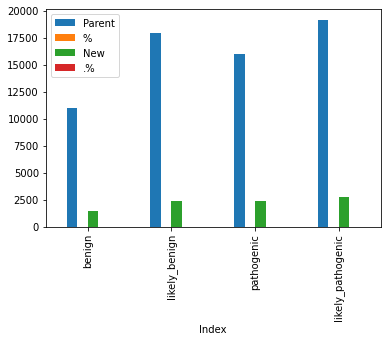

In [44]:
statistics_1_df.plot.bar()

In [45]:
a = len(omim_list) # List of OMIM genes
b = search_omim_df.shape[0] # OMIM contained in clinvar_vep_ref.vcf
c = omim_missence_canonical_df.shape[0] # OMIM missence and canonical variants
d = df_6.shape[0] # OMIM after script
e = df_1.shape[0] # OMIM before script
f = df_5.shape[0] # before splitting

OMIM missence and canonical variants

In [46]:
statistics_2_df = pd.DataFrame()
statistics_2_df["index"] = ['OMIM list', 'OMIM clinvar ann', 'filtred', 'after script']
statistics_2_df["number"] = [a, b, c, d]
statistics_2_df.set_index('index', inplace=True)
statistics_2_df

,number
index,
OMIM list,3950
OMIM clinvar ann,1503664
filtred,432380
after script,63383


<AxesSubplot:xlabel='index'>

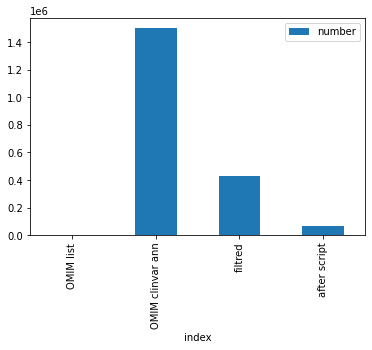

In [57]:
statistics_2_df.plot.bar()

Estimate gnomAD frequencies for each CLINSIG group

In [58]:
benign = 'OMIM_vep_gnomad/benign_vep.vcf'
pathogenic = 'OMIM_vep_gnomad/pathogenic_vep.vcf'
likely_benign = 'OMIM_vep_gnomad/likely_benign_vep.vcf'
likely_pathogenic = 'OMIM_vep_gnomad/likely_pathogenic_vep.vcf'
benign = 'OMIM_vep_gnomad/benign_vep.vcf'
pathogenic = 'OMIM_vep_gnomad/pathogenic_vep.vcf'
likely_benign = 'OMIM_vep_gnomad/likely_benign_vep.vcf'
likely_pathogenic = 'OMIM_vep_gnomad/likely_pathogenic_vep.vcf'

In [59]:
def make_header(file_name): # header creation function
    header_list = []
    with open(file_name, "r") as file:
        while True:
            line = file.readline()
            if not line:
                break
            if line.split()[0] == "#Uploaded_variation": # save the title
                header_list.append(line.split())
                return header_list[0]

In [60]:
def make_gnomAD_AF_df(name): # dataframe preparation function
    df_benign = pd.read_table(name, header=None, skiprows=[i for i in range(0,54)])
    df_benign.columns = make_header(name)
    df_2 = df_benign.iloc[:, [0,1,2,3,13]]
    gnomAD_AF = df_2[df_2['Extra'].str.contains("gnomAD_AF")==True]
    return gnomAD_AF

In [61]:
def make_freq_df(name): # freq_df creation function
    df = make_gnomAD_AF_df(name)
    freq_list = []
    for row in df.itertuples(): 
        freq_list.append(float((row[5].split(';')[5].split('=')[1])))
    freq_df = pd.DataFrame(freq_list, columns=[name.split('/')[1].split('.')[0]])
    return freq_df

In [62]:
benign_freq_df = make_freq_df(benign)
likely_benign_freq_df = make_freq_df(likely_benign)
pathogenic_freq_df = make_freq_df(pathogenic)
likely_pathogenic_freq_df = make_freq_df(likely_pathogenic)

Remove zero

In [64]:
benign_freq_non_zero_df = benign_freq_df.loc[benign_freq_df['benign_vep'] != 0]
likely_benign_non_zero_df = likely_benign_freq_df.loc[likely_benign_freq_df['likely_benign_vep'] != 0]
pathogenic_non_zero_df = pathogenic_freq_df.loc[pathogenic_freq_df['pathogenic_vep'] != 0]
likely_pathogenic_non_zero_df = likely_pathogenic_freq_df.loc[likely_pathogenic_freq_df['likely_pathogenic_vep'] != 0]

Descriptive statistics

In [65]:
gnomAD_freq_df = pd.concat([benign_freq_non_zero_df, likely_benign_non_zero_df, pathogenic_non_zero_df, likely_pathogenic_non_zero_df], axis=1)
gnomAD_freq_df.describe()

,benign_vep,likely_benign_vep,pathogenic_vep,likely_pathogenic_vep
count,116.000000,275.000000,94.000000,100.000000
mean,0.035397,0.052555,0.004591,0.000109
std,0.133527,0.127765,0.007252,0.000196
min,0.000004,0.000008,0.000029,0.000029
25%,0.000055,0.000030,0.000042,0.000029
50%,0.000089,0.000192,0.000087,0.000064
75%,0.001440,0.039880,0.013380,0.000069
max,0.618000,0.708700,0.023290,0.001731


Boxplot

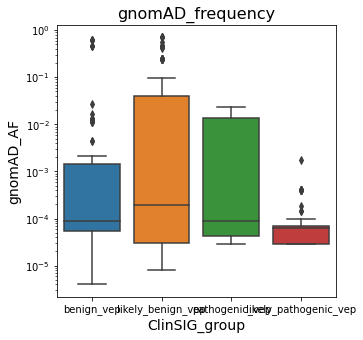

In [66]:
fig, ax= plt.subplots(figsize=(5, 5))
ax.set_yscale('log')
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(gnomAD_freq_df))
boxplot.axes.set_title("gnomAD_frequency", fontsize=16)
boxplot.set_xlabel("ClinSIG_group", fontsize=14)
boxplot.set_ylabel("gnomAD_AF", fontsize=14)
plt.show()

Calculate the percentage for non-zero gnomAD frequency for each ClinSIG group

In [67]:
b_per = benign_freq_non_zero_df.shape[0]/benign_freq_df.shape[0]*100
lb_per = likely_benign_non_zero_df.shape[0]/likely_benign_freq_df.shape[0]*100
p_per = pathogenic_non_zero_df.shape[0]/pathogenic_freq_df.shape[0]*100
lp_per = likely_pathogenic_non_zero_df.shape[0]/likely_pathogenic_freq_df.shape[0]*100

Counting the number of each ClinSIG group

In [68]:
b_abs = benign_freq_df.shape[0]
lb_abs = likely_benign_freq_df.shape[0]
p_abs = pathogenic_freq_df.shape[0]
lp_abs = likely_pathogenic_freq_df.shape[0]

In [69]:
pd.DataFrame({'clinsig':['benign', 'likely_benign', 'pathogenic', 'likely_pathogenic'],
        'abs_all':[b_abs, lb_abs, p_abs, lp_abs],
        'non_zero_percent':[b_per, lb_per, p_per, lp_per]})

,clinsig,abs_all,non_zero_percent
0,benign,815,14.233129
1,likely_benign,1609,17.091361
2,pathogenic,876,10.730594
3,likely_pathogenic,994,10.060362
